In [2]:
#standard 
import pandas as pd
import numpy as np

#viz
import matplotlib.pyplot as plt
import seaborn as sns

#my wrangle file
import wrangle

### Do you work for this exercise in either a jupyter notebook named evaluate within your regression-exercises repository. By the end of this exercise you will also create a python script named evaluate, so the overall deliverables for this exercise are the python script and jupyter notebook both with the name evaluate within your regression-exercises repo.

### Load your zillow dataset.

In [51]:
train, validate, test = wrangle.wrangle_zillow()

csv file found and loaded

train -> (1038959, 7)
validate -> (445269, 7)
test -> (371057, 7)


In [52]:
train.head()

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips
10057,4.0,2.0,1561.0,248240.0,1973.0,2504.40,6059.0
2004970,3.0,2.0,1770.0,88390.0,1960.0,1671.93,6037.0
306031,2.0,1.0,1452.0,81169.0,1946.0,1310.88,6037.0
1038595,3.0,1.0,1000.0,119174.0,1950.0,1900.28,6037.0
270959,3.0,2.0,1974.0,432268.0,1988.0,5315.27,6037.0


### Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calculatedfinishedsqft. Here is some sample code to get you started:

In [53]:
# from sklearn.linear_model import LinearRegression

# # assuming X and y are already defined
# model = LinearRegression().fit(X, y)
# predictions = model.predict(X)

### Modify and add to the code above as necessary for it to work with the zillow dataset.

In [54]:
train.head()

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips
10057,4.0,2.0,1561.0,248240.0,1973.0,2504.40,6059.0
2004970,3.0,2.0,1770.0,88390.0,1960.0,1671.93,6037.0
306031,2.0,1.0,1452.0,81169.0,1946.0,1310.88,6037.0
1038595,3.0,1.0,1000.0,119174.0,1950.0,1900.28,6037.0
270959,3.0,2.0,1974.0,432268.0,1988.0,5315.27,6037.0


In [55]:
#drop extra columns
train = train.drop(columns=['bedrooms','bathrooms',
                    'year_built','taxamount', 'fips'])

In [56]:
train.head()

,area,tax_value
10057,1561.0,248240.0
2004970,1770.0,88390.0
306031,1452.0,81169.0
1038595,1000.0,119174.0
270959,1974.0,432268.0


In [57]:
from sklearn.preprocessing import MinMaxScaler

In [58]:
# create the scaler and fit/transform my square footage column
mms = MinMaxScaler()

train['area'] = mms.fit_transform(train[['area']])

In [59]:
train.head()

,area,tax_value
10057,0.457612,248240.0
2004970,0.518921,88390.0
306031,0.425638,81169.0
1038595,0.293048,119174.0
270959,0.578762,432268.0


In [60]:
train.area.min()

0.0

In [61]:
train.area.max()

1.0

In [62]:
#split into my X_train and y_train
X_train = train[['area']]
y_train = train.tax_value

X_validate = validate[['area']]
y_validate = validate.tax_value

X_test = test[['area']]
y_test = test.tax_value

In [63]:
X_train.head()

,area
10057,0.457612
2004970,0.518921
306031,0.425638
1038595,0.293048
270959,0.578762


In [64]:
y_train.head()

10057      248240.0
2004970     88390.0
306031      81169.0
1038595    119174.0
270959     432268.0
Name: tax_value, dtype: float64

In [65]:
#make my ols model
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, y_train)
predictions = model.predict(X_train)

In [66]:
predictions

array([314131.12545964, 345309.67434113, 297870.54255015, ...,
       399312.7111598 , 197621.81121827, 250133.05143973])

In [67]:
#save predictions into train df
train['yhat'] = predictions

In [68]:
train.head()

,area,tax_value,yhat
10057,0.457612,248240.0,314131.125460
2004970,0.518921,88390.0,345309.674341
306031,0.425638,81169.0,297870.542550
1038595,0.293048,119174.0,230441.336357
270959,0.578762,432268.0,375742.324924


### Plot the residuals for the linear regression model that you made.

In [69]:
#calculate residuals (acutal - prediction)
train['residuals'] = train.tax_value - train.yhat

In [70]:
train.head()

,area,tax_value,yhat,residuals
10057,0.457612,248240.0,314131.125460,-65891.125460
2004970,0.518921,88390.0,345309.674341,-256919.674341
306031,0.425638,81169.0,297870.542550,-216701.542550
1038595,0.293048,119174.0,230441.336357,-111267.336357
270959,0.578762,432268.0,375742.324924,56525.675076


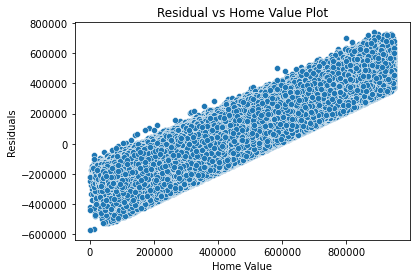

In [71]:
#make scatterplot of y-value vs residuals
sns.scatterplot(data=train, x='tax_value', y='residuals')

plt.xlabel('Home Value')
plt.ylabel('Residuals')
plt.title('Residual vs Home Value Plot')
plt.show()

### Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [76]:
from sklearn.metrics import mean_squared_error

#### MSE - mean squared error

In [78]:
MSE = mean_squared_error(train.tax_value, train.yhat)
MSE

32510725506.882072

#### SSE - sum or squared errors

In [81]:
SSE = MSE * len(train)
SSE

3.3777310861904692e+16

#### RMSE - root mean squared eror

In [83]:
RMSE = MSE**.5
RMSE

180307.30852320456

#### ESS - explained sum of squares

In [90]:
ESS = ((train.yhat - train.tax_value.mean())**2).sum()
ESS

7361327054841506.0

#### TSS - total sum of squares

In [91]:
TSS = ESS + SSE
TSS

4.11386379167462e+16

### Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).

In [95]:
train['baseline'] = train.tax_value.mean()

In [96]:
train.head()

,area,tax_value,yhat,residuals,baseline
10057,0.457612,248240.0,314131.125460,-65891.125460,327962.928757
2004970,0.518921,88390.0,345309.674341,-256919.674341,327962.928757
306031,0.425638,81169.0,297870.542550,-216701.542550,327962.928757
1038595,0.293048,119174.0,230441.336357,-111267.336357,327962.928757
270959,0.578762,432268.0,375742.324924,56525.675076,327962.928757


#### MSE

In [98]:
MSE_baseline = mean_squared_error(train.tax_value, train.baseline)
MSE_baseline

39596016702.04775

#### SSE

In [100]:
SSE_baseline = MSE_baseline * len(train)
SSE_baseline

4.113863791674283e+16

#### RSME

In [102]:
RMSE_baseline = MSE_baseline**.5
RMSE_baseline

198987.47875695032

### Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [104]:
if SSE < SSE_baseline:
    print('My OSL model performs better than baseline')
else:
    print('My OSL model performs worse than baseline. :( )')

My OSL model performs better than baseline


### What is the amount of variance explained in your model?

In [105]:
#manually
R2 = ESS / TSS
R2

0.17893949405274182

In [107]:
from sklearn.metrics import r2_score

In [108]:
#from sklearn
r2_score(train.tax_value, train.yhat)

0.17893949405267462

### Is your model better than the baseline model?

In [111]:
RMSE_baseline - RMSE

18680.17023374577

> it is better, but its still pretty bad and we probably don't want to use it

### Create a file named evaluate.py that contains the following functions.

- plot_residuals(y, yhat): creates a residual plot
- regression_errors(y, yhat): returns the following values:
    - sum of squared errors (SSE)
    - explained sum of squares (ESS)
    - total sum of squares (TSS)
    - mean squared error (MSE)
    - root mean squared error (RMSE)
- baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
- better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

In [114]:
def plot_residuals(y, yhat):
    residuals = y - yhat
    
    plt.scatter(x=y, y=residuals)
    plt.xlabel('Home Value')
    plt.ylabel('Residuals')
    plt.title('Residual vs Home Value Plot')
    plt.show()

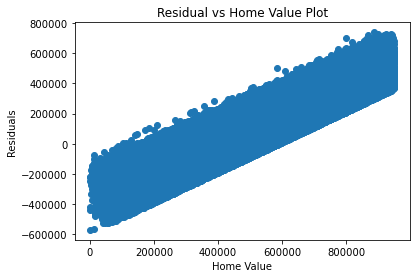

In [115]:
plot_residuals(train.tax_value, train.yhat)

In [117]:
def regression_errors(y, yhat):
    MSE = mean_squared_error(y, yhat)
    SSE = MSE * len(y)
    RMSE = MSE**.5
    
    ESS = ((yhat - y.mean())**2).sum()
    TSS = ESS + SSE
    
    return SSE, ESS, TSS, MSE, RMSE

In [118]:
regression_errors(train.tax_value, train.yhat)

(3.3777310861904692e+16,
 7361327054841506.0,
 4.11386379167462e+16,
 32510725506.882072,
 180307.30852320456)

In [128]:
def baseline_mean_errors(y):
    baseline = np.repeat(y.mean(), len(y))
    
    MSE = mean_squared_error(y, baseline)
    SSE = MSE * len(y)
    RMSE = MSE**.5
    
    return SSE, MSE, RMSE


In [130]:
baseline_mean_errors(train.tax_value)

(4.113863791674283e+16, 39596016702.04775, 198987.47875695032)

In [131]:
def better_than_baseline(y, yhat):
    SSE, ESS, TSS, MSE, RMSE = regression_errors(y, yhat)
    
    SSE_baseline, MSE_baseline, RMSE_baseline = baseline_mean_errors(y)
    
    if SSE < SSE_baseline:
        print('My OSL model performs better than baseline')
    else:
        print('My OSL model performs worse than baseline. :( )')

In [132]:
better_than_baseline(train.tax_value, train.yhat)


My OSL model performs better than baseline
